In [138]:
# import libraries
import numpy as np
import math
import matplotlib.pyplot as plt


***Programming Problems***

In [139]:
# question 1

# NOTE: Matrices and Vectors used in python functinos are 0-indexed not 1-indexed

# we need to make a function to solve tridiagonal system by crout's method
# NOTE: Because the system is tridiagonal, we can get away with less number of computations as every column is required to eliminate the value in the next
#       column only.

def crouts_method(a,b):

  # inputs:
  # a = coefficient matrix (interactions matrix)
  # b = stimulus vector

  # output:
  # x = response vector

  # in crout's decomposition we decompose the coefficient matrix into L and U matrices where L is lower triangular matrix
  # and U is upper triangular matrix with diagonal entries one
  # to save storage space, we store entries both of them in the same matrix.

  # dimension of the square matrix
  n = len(a)

  print(f"The Crout's Decomposition Algorithm starts....\n\n")
  # Elimination Step
  print(f"Elimination step...\n\n")
  for j in range(n-1):
    if(j<n):
      print(f"a[{j}][{j+1}] is coverted from {a[j][j+1]} to {a[j][j+1] / a[j][j]}")
      a[j][j+1] = a[j][j+1] / a[j][j]
      print(f"a[{j+1}][{j+1}] is converted from {a[j+1][j+1]} to {a[j+1][j+1] - a[j+1][j]*a[j][j+1]}")
      a[j+1][j+1] -= a[j+1][j]*a[j][j+1]

    print(f"After {j+1} iteration:\n")
    print(f"{a}\n\n")

  # Forward Substitution Step
  print(f"Forward substitution to determine the d, such that Ld = b\n")
  d = []
  d.append(b[0][0]/a[0][0])
  for j in range(1,n):
    d.append((b[j][0] - d[-1] * a[j][j-1])/a[j][j])

  d = np.array(d).reshape((n,1))
  print(f"The intermediate response matrix d is:\n{d}")

  # Backward Substituition Step
  print(f"\nBackward Substitution to determine x, such that Ux = d\n")
  x = []
  x.append(d[n-1][0])
  for j in range(1,n):
    x.append(d[n-j-1][0]-x[-1]*a[n-j-1][n-j])

  x.reverse()
  x = np.array(x).reshape((n,1))

  print(f'The final response vector is:\n{x}')

  return x

In [140]:
# array initialization
a = [[6,2,0,0,0],[-1,7,2,0,0],[0,-2,8,2,0],[0,0,3,7,-2],[0,0,0,3,5]]
#a = [[1,2,0],[1,3,2],[0,1,3]]
A = np.array(a,dtype=np.float128)
print(f"The coefficient matrix A is:\n{A}\n")

b = np.array([27,-3,4,-3,1],dtype = np.float128).reshape(5,1)
#b = np.array([5,13,11]).reshape(3,1)
print(f"The stimulus vector b is:\n{b}")

The coefficient matrix A is:
[[ 6.  2.  0.  0.  0.]
 [-1.  7.  2.  0.  0.]
 [ 0. -2.  8.  2.  0.]
 [ 0.  0.  3.  7. -2.]
 [ 0.  0.  0.  3.  5.]]

The stimulus vector b is:
[[27.]
 [-3.]
 [ 4.]
 [-3.]
 [ 1.]]


In [141]:
# crout's method function call
x = crouts_method(A,b)

The Crout's Decomposition Algorithm starts....


Elimination step...


a[0][1] is coverted from 2.0 to 0.3333333333333333
a[1][1] is converted from 7.0 to 7.333333333333333
After 1 iteration:

[[ 6.          0.33333333  0.          0.          0.        ]
 [-1.          7.33333333  2.          0.          0.        ]
 [ 0.         -2.          8.          2.          0.        ]
 [ 0.          0.          3.          7.         -2.        ]
 [ 0.          0.          0.          3.          5.        ]]


a[1][2] is coverted from 2.0 to 0.2727272727272727
a[2][2] is converted from 8.0 to 8.545454545454545
After 2 iteration:

[[ 6.          0.33333333  0.          0.          0.        ]
 [-1.          7.33333333  0.27272727  0.          0.        ]
 [ 0.         -2.          8.54545455  2.          0.        ]
 [ 0.          0.          3.          7.         -2.        ]
 [ 0.          0.          0.          3.          5.        ]]


a[2][3] is coverted from 2.0 to 0.234042553191489

In [142]:
# we can cross check our answer from obtained from Crout's Method by multiplying the the inverse of coefficient matrix on both sides of , Ax = b to get, x = A⁻¹ b

Z = np.array(a).reshape((len(a),-1))
print(f'The response vector x should be (from multiplying inverse of coefficient matrix on either side of the equation)')
print(np.linalg.inv(Z)@b)


The response vector x should be (from multiplying inverse of coefficient matrix on either side of the equation)
[[ 4.49049376]
 [ 0.02851873]
 [ 0.64543133]
 [-0.55320658]
 [ 0.53192395]]


Indeed our answer obtained from crouts_method function to solve tridiagonal systems based on Crout's Decomposition Algorithm is correct!!

In [143]:
# question 2

# subpart a

# we create a function, which specializes in solving equations of form, Ax = b, using Doolittle's Decomposition Algorithm
# where A = Hilbert matrix of order n
# bᵢ = Σ(from j= 1 to n)aᵢⱼ

# NOTE: Matrices and Vectors used in python functions are 0-indexed and not 1-indexed
# NOTE: To save storage space the L and U parts of the matrix decomposition are stored in one matrix only

def a_generator(n):

  a = np.zeros((n,n))

  for i in range(n):
    for j in range(n):
      a[i][j] = 1/(i+j+1)
  return a


def hilbert_matrix_solver(n,print_status):

  # input:
  # n = order of hilbert matrix
  # print_status = argument to decide, whether to print the intermediate steps of solving

  # output:
  # x = response vector, for the equation, Ax = b, where bᵢ = Σ(from j= 1 to n)aᵢⱼ

  a = a_generator(n)

  b = []

  for i in range(n):
    sum = 0.0
    for j in range(n):
      sum += a[i][j]
    b.append(sum)

  b = np.array(b).reshape((n,1))

  if(print_status):
    print(f"The Hilbert Matrix of order {n} is:\n\n{a}\n")
    print(f"\nThe Stimulus vector for the equation Ax = b is:\n{b}\n")

  # elimination step
  if(print_status):
    print(f"Elimination Step...")
  for i in range(n-1):
    for j in range(i+1,n):
      a[j][i] /= a[i][i]

    for j in range(i+1,n):
      for k in range(i+1,n):
        a[j][k] -= a[j][i] * a[i][k]

    if(print_status):
      print(f"\nAfter {i+1} iteration\n")
      print(a)

  # forward substitution step
  if(print_status):
    print(f"\n\nForward substitution to determine the d, such that Ld = b\n")
  d = []
  d.append(b[0][0])
  for i in range(1,n):
    sum = b[i][0]
    for j in range(i):
      sum -= a[i][j]*d[j]
    d.append(sum)

  d = np.array(d).reshape((n,1))
  if(print_status):
    print(f"The intermediate response matrix d is:\n{d}")

  # backward substitution step
  if(print_status):
    print(f"\n\nBackward substitution to determine the x, such that Ux = d\n")
  x = []
  x.append(d[n-1][0]/a[n-1][n-1])
  for i in range(1,n):
    sum = d[n-1-i][0]
    for j in range(i):
      sum -= a[n-1-i][n-1-j] * x[j]
    x.append(sum/a[n-1-i][n-1-i])

  # reverse the list x as we found th xi in the order from n, n-1, n-2...
  x.reverse()
  x = np.array(x).reshape((n,1))
  if(print_status):
    print(f"The final response matrix x is:\n{x}\n\n")

  return x


In [144]:
# hilbert_matrix_solver function call with input = 9 as my roll number is 230390
print_status = 1
x= hilbert_matrix_solver(9,print_status)

The Hilbert Matrix of order 9 is:

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1       ]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625    ]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     0.05882353]]


The Stimulus vector for the equation A

In [145]:
# subpart b

# we define a function to check significant digits in the response vector obtained from the hilbert_matrix_solver function

# significant digit checker

def significant_digit_checker(n,a,b):

  # input:
  # n = number of siginificant digits to check

  # output:
  # result = whether b is within n significant digits of a, 1 if yes, else 0

  l = len(a)
  tol = pow(10,1-n)
  for i in range(l):
    if(abs(a[i][0] - b[i][0]) >= tol):
      return False

  return True


In [146]:
# now we call this function for n=2 to n=10,
ans = []
X = []
for i in range(2,11):
  a = np.ones((i,1))
  x = hilbert_matrix_solver(i,0)
  X.append(x)
  ans.append(significant_digit_checker(6,a,x))


In [147]:
# subpart b continued
for i in range(len(ans)):
  print(f'does the answer match [1,1,...]T upto 6 significant digits for n = {i+2}? : {ans[i]}')

does the answer match [1,1,...]T upto 6 significant digits for n = 2? : True
does the answer match [1,1,...]T upto 6 significant digits for n = 3? : True
does the answer match [1,1,...]T upto 6 significant digits for n = 4? : True
does the answer match [1,1,...]T upto 6 significant digits for n = 5? : True
does the answer match [1,1,...]T upto 6 significant digits for n = 6? : True
does the answer match [1,1,...]T upto 6 significant digits for n = 7? : True
does the answer match [1,1,...]T upto 6 significant digits for n = 8? : True
does the answer match [1,1,...]T upto 6 significant digits for n = 9? : False
does the answer match [1,1,...]T upto 6 significant digits for n = 10? : False


In [148]:
# we can verify the above result,
# NOTE: the X vector starts indexing from 0 but the first element corresponds to hilbert matrix of order 2

print(f"Response vector for n = 8\n")
print(X[8-2])
print(f"\nResponse vector for n = 9\n")
print(X[9-2])

Response vector for n = 8

[[1.        ]
 [1.        ]
 [0.99999998]
 [1.00000013]
 [0.99999966]
 [1.00000049]
 [0.99999965]
 [1.0000001 ]]

Response vector for n = 9

[[1.        ]
 [1.00000002]
 [0.99999972]
 [1.00000197]
 [0.99999278]
 [1.00001471]
 [0.99998313]
 [1.00001017]
 [0.99999749]]


*From the above it is clear that the largest n for which the answer generated by the hilbert_matrix_solver function is within 6 significant digits of the exact answer is n=8*

In [149]:
 # subpart c

 # we define a function which returns the inverse of the hilbert matrix given its order and pass n=8 as the argument

def hilbert_inv(n,print_status,i):

  # input:
  # n = order of hilbert matrix
  # print_status = argument to decide, whether to print the intermediate steps of solving
  # i = to specify the ith unit vector

  # output:
  # x = response vector, for the equation, Ax = b, where bᵢ = Σ(from j= 1 to n)aᵢⱼ

  a = a_generator(n)

  b = np.zeros((n,1))
  b[i][0] = 1
  if(print_status):
    print(f"The Hilbert Matrix of order {n} is:\n\n{a}\n")
    print(f"\nThe Stimulus vector for the equation Ax = b is:\n{b}\n")

  # elimination step
  if(print_status):
    print(f"Elimination Step...")
  for i in range(n-1):
    for j in range(i+1,n):
      a[j][i] /= a[i][i]

    for j in range(i+1,n):
      for k in range(i+1,n):
        a[j][k] -= a[j][i] * a[i][k]

    if(print_status):
      print(f"\nAfter {i+1} iteration\n")
      print(a)

  # forward substitution step
  if(print_status):
    print(f"\n\nForward substitution to determine the d, such that Ld = b\n")
  d = []
  d.append(b[0][0])
  for i in range(1,n):
    sum = b[i][0]
    for j in range(i):
      sum -= a[i][j]*d[j]
    d.append(sum)

  d = np.array(d).reshape((n,1))
  if(print_status):
    print(f"The intermediate response matrix d is:\n{d}")

  # backward substitution step
  if(print_status):
    print(f"\n\nBackward substitution to determine the x, such that Ux = d\n")
  x = []
  x.append(d[n-1][0]/a[n-1][n-1])
  for i in range(1,n):
    sum = d[n-1-i][0]
    for j in range(i):
      sum -= a[n-1-i][n-1-j] * x[j]
    x.append(sum/a[n-1-i][n-1-i])

  # reverse the list x as we found th xi in the order from n, n-1, n-2...
  x.reverse()
  x = np.array(x).reshape((n,1))
  if(print_status):
    print(f"The final response matrix x is:\n{x}\n\n")

  return x


In [150]:
# the complete hilbert inverse function which takes order of hilbert matrix as input ad returns the inverse of the matrix leveraging LU decomposition
# by Doolittle's Algortihm

def hilbert_inverse(n):

  # input:
  # n = order of hilbert matrix

  # output:
  # the inverse of the hilbert matrix of order n

  vector_array = []
  print_status = 1
  for i in range(n):
    vector_array.append(hilbert_inv(n,print_status,i))

  inverse = vector_array[0]
  for i in range(1,n):
    inverse = np.concatenate((inverse, vector_array[i]), axis = 1)

  return inverse

In [151]:
# we call the hilbert_inverse function for n=8
inverse = hilbert_inverse(8)
print(inverse)

The Hilbert Matrix of order 8 is:

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125     ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1       ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667]]


The Stimulus vector for the equation Ax = b is:
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Elimination Step...

After 1 iteration

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125     ]

In [152]:
# we can verify the answer by multiplying the hilbert matrix of order 8 with its inverse
print(a_generator(8) @ inverse)

[[ 1.00000000e+00 -5.82076609e-11 -1.86264515e-09 -7.45058060e-09
   2.98023224e-08  2.98023224e-08  1.49011612e-08 -7.45058060e-09]
 [ 3.55128273e-12  1.00000000e+00 -1.62259716e-09 -1.29233920e-08
   6.97876891e-09 -1.85265323e-08 -9.43138088e-09 -2.74542622e-09]
 [ 8.05622229e-13 -5.38459940e-11  9.99999997e-01  7.16070440e-09
  -3.30065978e-09  3.15750402e-08 -2.57844280e-08 -1.25440670e-09]
 [ 4.33489608e-12 -1.83223618e-10  1.84910939e-09  9.99999986e-01
   1.88194654e-08 -5.20256089e-08  4.51751482e-08 -1.12380616e-08]
 [ 5.39194615e-12 -2.84971750e-10  1.11135856e-09 -1.34178343e-08
   1.00000004e+00 -2.87960604e-08  1.52782061e-08 -3.92171481e-09]
 [ 2.34923187e-13  5.70852769e-11 -1.77809152e-09  2.92918702e-09
  -2.83294404e-08  1.00000003e+00 -7.79862208e-09  1.32755810e-09]
 [-1.67983087e-12  1.42403676e-10 -1.64180555e-09  1.53751525e-09
  -3.17021829e-08  2.42786207e-08  9.99999966e-01  2.75864994e-09]
 [ 1.07838923e-12 -9.77397127e-11  5.01668485e-10 -1.42319668e-08
   

In [153]:
# question 3

# subpart a

# we create a function to give us the coefficient matrix as defined in the question
def coeff_matrix_generator(n,val):

  # input:
  # n = order of the matrix

  # output:
  # a = required coefficient matrix

  # declare A (as mentioned in the question)
  a = np.zeros((n,n))
  for i in range(n-1):
    a[i][i-1] = -1
    a[i][i] = val
    a[i][i+1] = -1
  a[0][-1] = 1
  a[-1][0] = 1
  a[-1][-2] = -1
  a[-1][-1] = val

  return a

# we define a function to solve the system of equations as mentioned in the question by Jacobi Method

# NOTE: There can be cases where the estimate may be slow to converge an may take many iterations,
#       so, the estimate is printed every 100 iterations so that the output file is not bloated too
#       too much by the number of printed iterations
def jacobi_solver(n, tol,val,MAX,print_status=0):
  if(print_status):
    print(f"This function solves the system using Jacobi Iterative Algorithm\n\n")

  # inputs:
  # n = number of unknowns = number of components * number of stages
  # tol = tolerance for convergence
  # val = the diagonal element depending on the subpart of the question
  # MAX = the maximum number of iterations

  # intial guess for estimate
  x_old = np.zeros((n,1),dtype = np.float128)
  x_new = np.zeros((n,1),dtype = np.float128)

  b = np.zeros((n,1))
  b[-1][0] = 1

  a = coeff_matrix_generator(n,val)

  if(print_status):
    print(f'The coefficient matrix for order {n} is:\n{a}\n')
    print(f'The stimulus vector for order {n} is:\n{b}\n')

  iter=0
  main_flag = 1

  while(main_flag==1 and iter<MAX):

    main_flag = 0

    #print(f'\n----------------------------------------------------')
    if(print_status==1 and iter%100==0):
      print(f"After {iter} iterations,estimate of response vector x is:\n{x_old}\n")
    iter+=1

    for i in range(n):
      sum = b[i][0]
      #print(f"sum initialised to b[{i}] = {sum}")
      for j in range(n):
        if(j!=i):
          #print(f"a[{i}][{j}] = {a[i][j]} and x_old[{j}] = {x_old[j][0]}")
          sum = sum - x_old[j][0]*a[i][j]
          #print(f"sum modified to {sum}")

        #else:
          #print(f"skip becuase j={i}")

      #print(f"x_new[{i}] is updated to {sum/a[i][i]}")
      x_new[i][0] = sum/a[i][i]


    for i in range(n):
      if(abs((x_new[i][0] - x_old[i][0])/x_new[i][0]) >= tol):
        main_flag = 1
        x_old = x_new.copy()
        break
  if(print_status):
    print(f"After {iter} iterations, the final estimate of response vector x is:\n{x_new}\n")

  return x_new,iter

In [154]:
# we test this function for n = 20, and tolerance = 1e-9 which is the case in subpart b
n = 20
tol = 1e-9
val = 2
MAX=1000
print_status = 1

# jacobi_solver function call
x,iter = jacobi_solver(n,tol,val,MAX,print_status)
print(f"\nIterations required to converge {iter}")

This function solves the system using Jacobi Iterative Algorithm


The coefficient matrix for order 20 is:
[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  

<ipython-input-153-d1f2c422642a>:84: RuntimeWarning: invalid value encountered in scalar divide
  if(abs((x_new[i][0] - x_old[i][0])/x_new[i][0]) >= tol):


After 600 iterations,estimate of response vector x is:
[[-4.49764207]
 [-3.99770122]
 [-3.49787288]
 [-2.99804454]
 [-2.49831191]
 [-1.99857927]
 [-1.49891618]
 [-0.99925308]
 [-0.49962654]
 [ 0.        ]
 [ 0.49962654]
 [ 0.99925308]
 [ 1.49891618]
 [ 1.99857927]
 [ 2.49831191]
 [ 2.99804454]
 [ 3.49787288]
 [ 3.99770122]
 [ 4.49764207]
 [ 4.99758292]]

After 700 iterations,estimate of response vector x is:
[[-4.49931684]
 [-3.99933398]
 [-3.49938371]
 [-2.99943345]
 [-2.49951091]
 [-1.99958837]
 [-1.49968598]
 [-0.9997836 ]
 [-0.4998918 ]
 [ 0.        ]
 [ 0.4998918 ]
 [ 0.9997836 ]
 [ 1.49968598]
 [ 1.99958837]
 [ 2.49951091]
 [ 2.99943345]
 [ 3.49938371]
 [ 3.99933398]
 [ 4.49931684]
 [ 4.9992997 ]]

After 800 iterations,estimate of response vector x is:
[[-4.49980207]
 [-3.99980703]
 [-3.49982144]
 [-2.99983585]
 [-2.4998583 ]
 [-1.99988074]
 [-1.49990902]
 [-0.9999373 ]
 [-0.49996865]
 [ 0.        ]
 [ 0.49996865]
 [ 0.9999373 ]
 [ 1.49990902]
 [ 1.99988074]
 [ 2.4998583 ]
 [ 2.9

In [155]:
# subpart b

# we define a function which solve the system under study using gauss seidel iteratve algorithm

# NOTE: There can be cases where the estimate may be slow to converge an may take many iterations,
#       so, the estimate is printed every 100 iterations so that the output file is not bloated too
#       too much by the number of printed iterations

def gauss_seidel(n,tol,val,MAX,print_status=0):
  if(print_status):
    print(f"This function solves the system using Gauss-Seidel Iterative Algorithm\n\n")

  # inputs:
  # n = number of unknowns = number of components * number of stages
  # tol = tolerance for convergence

  # intial guess for estimate
  x_old = np.zeros((n,1))
  x = np.zeros((n,1))
  b = np.zeros((n,1))
  b[-1][0] = 1

  a = coeff_matrix_generator(n,val)
  main_flag = 1
  iter = 0
  while(main_flag==1 and iter<MAX):
    main_flag = 0
    if(print_status==1 and iter%100==0):
      print(f"After {iter} iterations,estimate of response vector x is:\n{x_old}\n")
    iter+=1
    for i in range(n):
      sum = b[i][0]
      for j in range(n):
        if(j!=i):
          sum-= x[j][0]*a[i][j]
      x[i][0] = sum/a[i][i]


    for i in range(n):
      if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):
        main_flag = 1
        x_old = x.copy()
        break


  return x,iter

In [156]:
# we define an rms function which will be used as metric to determine optimal relaxation coefficient
def rms(a,b):
  err = a-b
  err2 = err*err
  sum = np.sum(err2)
  ans = math.sqrt(sum/len(a))

  return ans

# we define a function which solve the system under study using gauss seidel iteratve algorithm with relaxation

# NOTE: There can be cases where the estimate may be slow to converge an may take many iterations,
#       so, the estimate is printed every 100 iterations so that the output file is not bloated too
#       too much by the number of printed iterations

def relaxed_gauss_seidel(n,tol,relax,val,MAX,print_status=0):
  if(print_status):
    print(f"This function solves the system using Gauss-Seidel Iterative Algorithm with Relaxation\n\n")

  # inputs:
  # n = number of unknowns = number of components * number of stages
  # tol = tolerance for convergence

  # intial guess for estimate
  x_old = np.zeros((n,1),dtype = np.float128)
  x = np.zeros((n,1),dtype = np.float128)
  b = np.zeros((n,1),dtype = np.float128)
  b[-1][0] = 1.0

  a = coeff_matrix_generator(n,val)
  a_inv = np.linalg.inv(a)
  main_flag = 1
  iter = 0
  while(main_flag==1 and iter<MAX):
    main_flag = 0
    if(print_status==1 and iter%100==0):
      print(f"After {iter} iterations,estimate of response vector x is:\n{x_old}\n")
    iter+=1
    for i in range(n):
      sum = b[i][0]
      for j in range(n):
        if(j!=i):
          sum-= x[j][0]*a[i][j]
      x_previous = x.copy()
      x[i][0] = sum/a[i][i]
      x = (relax) * x.copy() + (1.0-relax) * x_previous


    for i in range(n):
      if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):
        main_flag = 1
        x_old = x.copy()
        break

  rms_val = rms(x,a_inv@b)

  return x,rms_val,iter

In [157]:
# subpart b continued (using the above defined functions to get the solutions)
n = 20
tol = 1e-9
val = 2
MAX=10000

b = np.zeros((n,1),dtype = np.float128)
b[-1][0] = 1.0

# gauss-seidel without relaxation
x,iter= gauss_seidel(n,tol,val,MAX)
print(f"The final estimate after convergence\n{x}")
print(f"Iterations required to converge {iter}")

<ipython-input-155-1aac3bf52f17>:40: RuntimeWarning: invalid value encountered in scalar divide
  if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):


The final estimate after convergence
[[-4.50000000e+00]
 [-4.00000000e+00]
 [-3.50000000e+00]
 [-3.00000000e+00]
 [-2.50000000e+00]
 [-2.00000000e+00]
 [-1.50000000e+00]
 [-1.00000000e+00]
 [-5.00000000e-01]
 [ 7.93809463e-15]
 [ 5.00000000e-01]
 [ 1.00000000e+00]
 [ 1.50000000e+00]
 [ 2.00000000e+00]
 [ 2.50000000e+00]
 [ 3.00000000e+00]
 [ 3.50000000e+00]
 [ 4.00000000e+00]
 [ 4.50000000e+00]
 [ 5.00000000e+00]]
Iterations required to converge 1415


In [158]:
# with relaxation coefficient  = 0

x,rms_val,iter = relaxed_gauss_seidel(n,tol,0,val,MAX)
print(f"The final estimate after convergence\n{x}")
print(f"\nRMS Value = {rms_val}")
print(f"Iterations required to converge {iter}")

The final estimate after convergence
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

RMS Value = 2.893959225697552
Iterations required to converge 1


<ipython-input-156-8dcf0d1f57a4>:50: RuntimeWarning: invalid value encountered in scalar divide
  if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):


In [159]:
# with relaxation coefficient  = 0.5

x,rms_val,iter = relaxed_gauss_seidel(n,tol,0.5,val,MAX)
print(f"The final estimate after convergence\n{x}")
print(f"\nRMS Value = {rms_val}")
print(f"Iterations required to converge {iter}")

<ipython-input-156-8dcf0d1f57a4>:50: RuntimeWarning: invalid value encountered in scalar divide
  if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):


The final estimate after convergence
[[-4.50000000e+00]
 [-4.00000000e+00]
 [-3.50000000e+00]
 [-3.00000000e+00]
 [-2.50000000e+00]
 [-2.00000000e+00]
 [-1.50000000e+00]
 [-1.00000000e+00]
 [-5.00000000e-01]
 [-1.08962318e-17]
 [ 5.00000000e-01]
 [ 1.00000000e+00]
 [ 1.50000000e+00]
 [ 2.00000000e+00]
 [ 2.50000000e+00]
 [ 3.00000000e+00]
 [ 3.50000000e+00]
 [ 4.00000000e+00]
 [ 4.50000000e+00]
 [ 5.00000000e+00]]

RMS Value = 4.579405579962394e-15
Iterations required to converge 5012


In [160]:
# with relaxation coefficient  = 1.0

x,rms_val,iter = relaxed_gauss_seidel(n,tol,1.0,val,MAX)
print(f"The final estimate after convergence\n{x}")
print(f"\nRMS Value = {rms_val}")
print(f"Iterations required to converge {iter}")

<ipython-input-156-8dcf0d1f57a4>:50: RuntimeWarning: invalid value encountered in scalar divide
  if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):


The final estimate after convergence
[[-4.50000000e+00]
 [-4.00000000e+00]
 [-3.50000000e+00]
 [-3.00000000e+00]
 [-2.50000000e+00]
 [-2.00000000e+00]
 [-1.50000000e+00]
 [-1.00000000e+00]
 [-5.00000000e-01]
 [ 2.15485182e-18]
 [ 5.00000000e-01]
 [ 1.00000000e+00]
 [ 1.50000000e+00]
 [ 2.00000000e+00]
 [ 2.50000000e+00]
 [ 3.00000000e+00]
 [ 3.50000000e+00]
 [ 4.00000000e+00]
 [ 4.50000000e+00]
 [ 5.00000000e+00]]

RMS Value = 4.570398478574246e-15
Iterations required to converge 1716


In [161]:
# with relaxation coefficient  = 1.5

x,rms_val,iter = relaxed_gauss_seidel(n,tol,1.5,val,MAX)
print(f"The final estimate after convergence\n{x}")
print(f"\nRMS Value = {rms_val}")
print(f"Iterations required to converge {iter}")

<ipython-input-156-8dcf0d1f57a4>:50: RuntimeWarning: invalid value encountered in scalar divide
  if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):


The final estimate after convergence
[[-4.5000000e+00]
 [-4.0000000e+00]
 [-3.5000000e+00]
 [-3.0000000e+00]
 [-2.5000000e+00]
 [-2.0000000e+00]
 [-1.5000000e+00]
 [-1.0000000e+00]
 [-5.0000000e-01]
 [ 7.0989428e-20]
 [ 5.0000000e-01]
 [ 1.0000000e+00]
 [ 1.5000000e+00]
 [ 2.0000000e+00]
 [ 2.5000000e+00]
 [ 3.0000000e+00]
 [ 3.5000000e+00]
 [ 4.0000000e+00]
 [ 4.5000000e+00]
 [ 5.0000000e+00]]

RMS Value = 4.57403528008975e-15
Iterations required to converge 10000


In [162]:
# with relaxation coefficient  = 2.0

x,rms_val,iter = relaxed_gauss_seidel(n,tol,2.0,val,MAX)
print(f"The final estimate after convergence\n{x}")
print(f"\nRMS Value = {rms_val}")
print(f"Iterations taken to converge (or diverge if RMS = inf)) {iter}")

<ipython-input-156-8dcf0d1f57a4>:50: RuntimeWarning: invalid value encountered in scalar divide
  if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):
<ipython-input-156-8dcf0d1f57a4>:50: RuntimeWarning: divide by zero encountered in scalar divide
  if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):


The final estimate after convergence
[[-3.]
 [-3.]
 [-3.]
 [-3.]
 [-3.]
 [-3.]
 [-3.]
 [-3.]
 [-3.]
 [-3.]
 [-3.]
 [-3.]
 [-3.]
 [-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]]

RMS Value = 2.8939592256975537
Iterations taken to converge (or diverge if RMS = inf)) 10000


***We observe that out of the above values of relaxation coefficient, RMS is minimum at relaxataion = 1.5***

*We can cross validate this valur by checking values near 1.5*

<ipython-input-156-8dcf0d1f57a4>:50: RuntimeWarning: invalid value encountered in scalar divide
  if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):


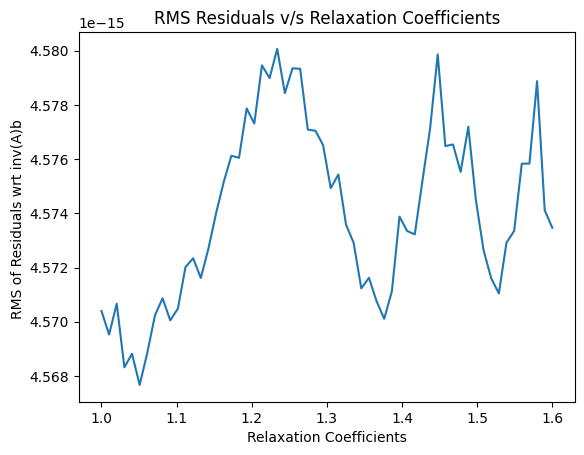

In [163]:
# subpart c

# we check for optimum relaxation between values, 1.0 to 1.6

relax = np.linspace(1.0,1.6,num=60,endpoint=True)

rms_array = []
iter_array = []

for l in relax:
  x,rms_val,iter = relaxed_gauss_seidel(n,tol,l,val,MAX)
  rms_array.append(rms_val)
  iter_array.append(iter)

# plotting commands
plt.plot(relax,rms_array)
plt.xlabel("Relaxation Coefficients")
plt.ylabel("RMS of Residuals wrt inv(A)b ")
plt.title("RMS Residuals v/s Relaxation Coefficients")
plt.show()

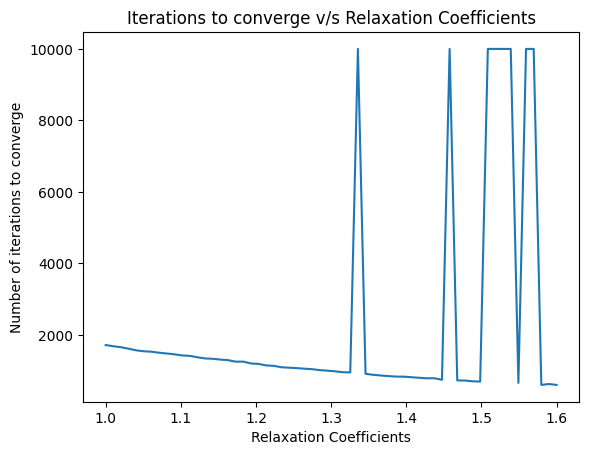

In [164]:
# plotting commands

plt.plot(relax,iter_array)
plt.xlabel("Relaxation Coefficients")
plt.ylabel("Number of iterations to converge")
plt.title("Iterations to converge v/s Relaxation Coefficients")
plt.show()

***From the above figures we can confidently state that the optimum relaxation for this problem is somewhere between 1.4 and 1.5 as,***

*1) The RMS of residuals is low which means the estimate actually converges to the correct answer and not diverges like when relaxation is greater than 1.5*


***subpart d***

*It is clearly evident that the sum of absolute values of non-diagonal elements in a row is equal to the absolute value of the diagonal element in the coefficient matrix A i.e.*

*The system is not diagonally dominant so we cannot comment analytically whether the estimate converges or not as diagonal dominance is a sufficient condition and not a necessary condition*

*Although by looking at the values of estimates from Jacobi, Gauss-Seidel and Gauss-Seidel with Optimal Relaxation, we can conclude on a case by basis that the estimates converge*

In [165]:
# optimum relaxation factor selection

# Notice that the rms values are very small (of the order of 1e-18 for all relaxations from 1 to 1.5), so we select relaxation such that the number of
# iterations for convergence is minimum

min = iter_array[0]
index=0

for l in relax:
  if(l>=1.5):
    break
  else:
    if(iter_array[index]<min):
      min = iter_array[index]
      relax_coeff = l

  index+=1

print(f"The optimal Relaxation Coefficient is {relax_coeff} for which algorithm converges within {min} iterations")

The optimal Relaxation Coefficient is 1.4983050847457626 for which algorithm converges within 694 iterations


In [166]:
# subpart e
n = 20
tol = 1e-9
val = 4
MAX=10000
x_jacobi, iter_jacobi = jacobi_solver(n,tol,val,MAX)
x_gauss_seidel, iter_gauss_seidel = gauss_seidel(n,tol,val,MAX)
# for relaxation = 1.3
x_relaxed_gauss_seidel,rms_val,iter_relaxed_gauss_seidel = relaxed_gauss_seidel(n,tol,1.3,val,MAX)

<ipython-input-153-d1f2c422642a>:84: RuntimeWarning: invalid value encountered in scalar divide
  if(abs((x_new[i][0] - x_old[i][0])/x_new[i][0]) >= tol):
<ipython-input-155-1aac3bf52f17>:40: RuntimeWarning: invalid value encountered in scalar divide
  if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):
<ipython-input-155-1aac3bf52f17>:40: RuntimeWarning: divide by zero encountered in scalar divide
  if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):
<ipython-input-156-8dcf0d1f57a4>:50: RuntimeWarning: invalid value encountered in scalar divide
  if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):


In [167]:
print(f'The Jacobi Method converges within {iter_jacobi} iterations to yield the estimate\n{x_jacobi}\n')
print(f'The Gauss-Seidel Method converges within {iter_gauss_seidel} iterations to yield the estimate\n{x_gauss_seidel}\n')
print(f'The Gauss-Seidel Method with Relaxation converges within {iter_relaxed_gauss_seidel} iterations to yield the estimate\n{x_relaxed_gauss_seidel}\n')

The Jacobi Method converges within 43 iterations to yield the estimate
[[-7.73502692e-02]
 [-2.07259421e-02]
 [-5.55349941e-03]
 [-1.48805549e-03]
 [-3.98722562e-04]
 [-1.06834753e-04]
 [-2.86164518e-05]
 [-7.63105381e-06]
 [-1.90776345e-06]
 [ 0.00000000e+00]
 [ 1.90776345e-06]
 [ 7.63105381e-06]
 [ 2.86164518e-05]
 [ 1.06834753e-04]
 [ 3.98722562e-04]
 [ 1.48805549e-03]
 [ 5.55349941e-03]
 [ 2.07259421e-02]
 [ 7.73502692e-02]
 [ 2.88675135e-01]]

The Gauss-Seidel Method converges within 44 iterations to yield the estimate
[[-7.73502692e-02]
 [-2.07259421e-02]
 [-5.55349941e-03]
 [-1.48805549e-03]
 [-3.98722562e-04]
 [-1.06834753e-04]
 [-2.86164518e-05]
 [-7.63105381e-06]
 [-1.90776345e-06]
 [ 0.00000000e+00]
 [ 1.90776345e-06]
 [ 7.63105381e-06]
 [ 2.86164518e-05]
 [ 1.06834753e-04]
 [ 3.98722562e-04]
 [ 1.48805549e-03]
 [ 5.55349941e-03]
 [ 2.07259421e-02]
 [ 7.73502692e-02]
 [ 2.88675135e-01]]

The Gauss-Seidel Method with Relaxation converges within 88 iterations to yield the esti

***The new system is different in the sense that it is diagonally dominant and its convergence is guaranteed***

<ipython-input-156-8dcf0d1f57a4>:50: RuntimeWarning: invalid value encountered in scalar divide
  if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):
<ipython-input-156-8dcf0d1f57a4>:50: RuntimeWarning: divide by zero encountered in scalar divide
  if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):


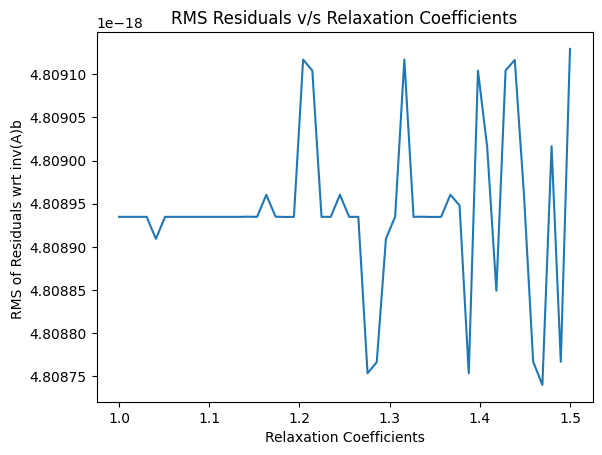

In [168]:
# we check for optimum relaxation between values, 1.0 to 1.5

relax = np.linspace(1.0,1.5,num=50,endpoint=True)

rms_array = []
iter_array = []

for l in relax:
  x,rms_val,iter = relaxed_gauss_seidel(n,tol,l,val,MAX)
  rms_array.append(rms_val)
  iter_array.append(iter)

# plotting commands
plt.plot(relax,rms_array)
plt.xlabel("Relaxation Coefficients")
plt.ylabel("RMS of Residuals wrt inv(A)b ")
plt.title("RMS Residuals v/s Relaxation Coefficients")
plt.show()

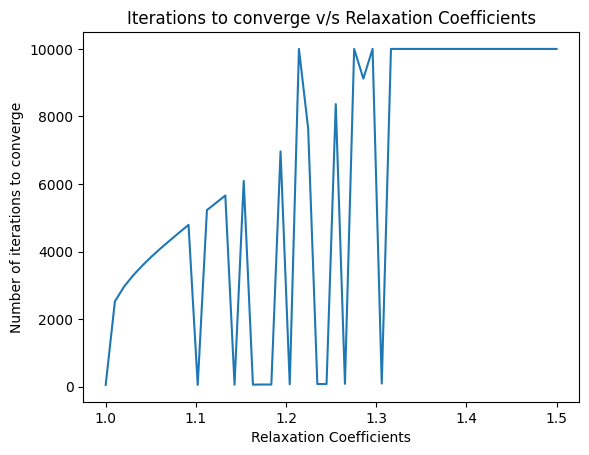

In [169]:
# plotting commands

plt.plot(relax,iter_array)
plt.xlabel("Relaxation Coefficients")
plt.ylabel("Number of iterations to converge")
plt.title("Iterations to converge v/s Relaxation Coefficients")
plt.show()

In [170]:
# optimum relaxation factor selection

# Notice that the rms values are very small (of the order of 1e-18 for all relaxations from 1 to 1.5, so we select relaxation such that the number of
# iterations for convergence is minimum

min = iter_array[0]
index=0

for l in relax:
  if(l>=1.5):
    break
  else:
    if(iter_array[index]<min):
      min = iter_array[index]
      relax_coeff = l

  index+=1

print(f"The optimal Relaxation Coefficient is {relax_coeff} for which algorithm converges within {min} iterations")

The optimal Relaxation Coefficient is 1.1020408163265305 for which algorithm converges within 49 iterations


***As the system is diagonally dominant, the convergence is guaranteed***




***Bonus Problem (Programming Part)***

In [171]:
# Bonus Problem

# subpart b

A = np.array([[1.0,1,0,0],[0,2,1,-1],[0,-1,2,-1],[0,1,0,1]])
D = np.array([[1.0,0,0,0],[0,2,0,0],[0,-1,2,0],[0,1,0,1]])
E = D-A
n = 4
b = np.array([1,2,1,1]).reshape((4,1))

T = np.linalg.inv(D)@E
c = np.linalg.inv(D)@b

x = np.zeros((4,1))

MAX = 10000
tol = 1e-9
main_flag = 1

iter = 0

while(main_flag==1 and iter<MAX):
  main_flag = 0
  x_old = x.copy()
  x = c + T @ x_old
  iter+=1

  for i in range(n):
      if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):
        main_flag = 1
        x_old = x.copy()
        break

print(f'The final estimate of the response vector is \n{x}')


The final estimate of the response vector is 
[[0.13333333]
 [0.46666667]
 [0.8       ]
 [0.53333333]]


<ipython-input-171-1d082bf628be>:29: RuntimeWarning: divide by zero encountered in scalar divide
  if(abs((x[i][0] - x_old[i][0])/x[i][0]) >= tol):


In [172]:
# whereas the actual answer is
print(np.linalg.inv(A) @ b)

[[0.33333333]
 [0.66666667]
 [1.        ]
 [0.33333333]]
